In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import libraries and data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [3]:
data = pd.read_csv('Walmart_Store_sales.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


# EDA
## Basic statistics

In [4]:
print(f'The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset contains 150 rows and 8 columns.


In [5]:
data.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


All columns except *Store* contains missing data. The max percentage of missing values being 12% and the number of features for our model being quite small, we will try not to drop any columns and find the best way to impute these missing values. 

However, we will drop rows with missing *Weekly_Sales* as it is our target variable and we don't want introduce any biais in our model predictions by imputing these data. 

In [5]:
print("Percentage of missing values: ")
round(100*data.isnull().sum()/data.shape[0] ,2).sort_values(ascending=False)

Percentage of missing values: 


Date            12.00
Temperature     12.00
Unemployment    10.00
Weekly_Sales     9.33
Fuel_Price       9.33
Holiday_Flag     8.00
CPI              8.00
Store            0.00
dtype: float64

Let's go through each of our features to identify what processing tasks will need to be done

## Target variable
The sales are very different from a store to another as well as from a month to another.

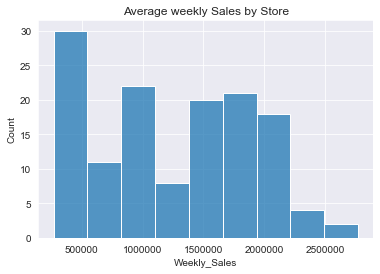

In [62]:
#plt.figure(figsize=(15, 5))
sns.histplot(x=data['Weekly_Sales']).set_title('Average weekly Sales by Store')
plt.ticklabel_format(style='plain', axis='x');

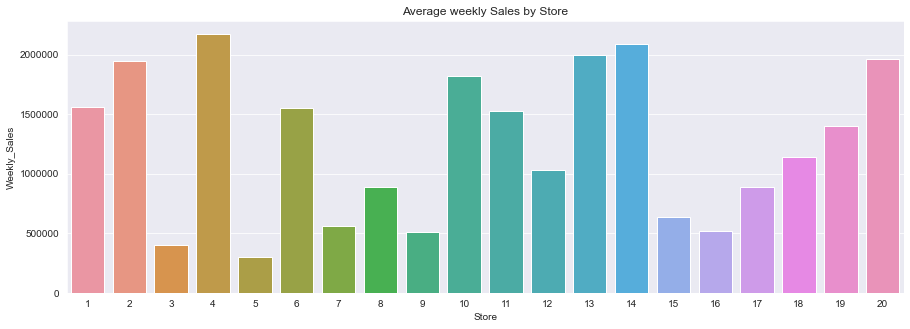

In [63]:
plt.figure(figsize=(15, 5))
sns.barplot(data=data, x=data['Store'].astype('int'), y='Weekly_Sales', ci=None).set_title('Average weekly Sales by Store')
plt.ticklabel_format(style='plain', axis='y');

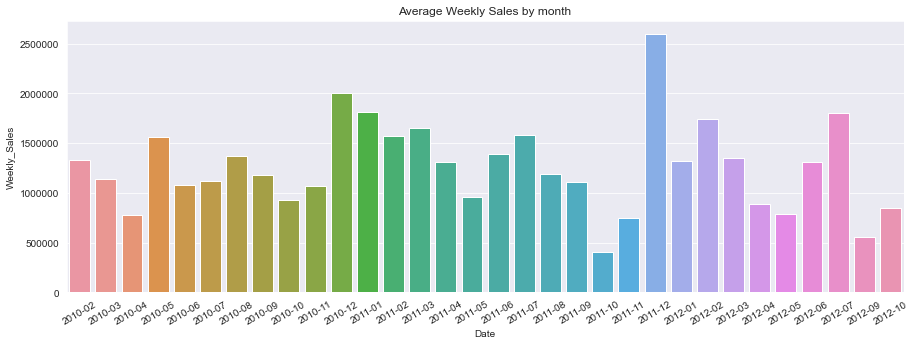

In [64]:
plt.figure(figsize=(15, 5))
sns.barplot(x=data['Date'].dt.to_period('M').sort_values(), y=data['Weekly_Sales'], ci=None).set_title("Average Weekly Sales by month")
plt.xticks(rotation=30)
plt.ticklabel_format(style='plain', axis='y');

## Categorical variables
### Store

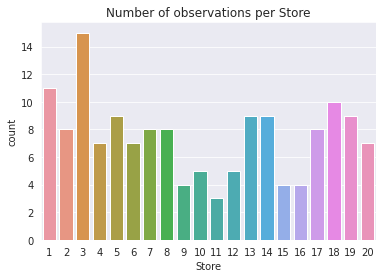

In [6]:
sns.countplot(x=data['Store'].astype('int')).set(title='Number of observations per Store');

#### Date
*Date* is not really a categorical variable as it can not be used in its current state by the model. We will later create some features from it (extract day, month etc.) but first we need to investigate the missing data and try to find out a way to impute them.
First let's convert the column into datetime

In [6]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [7]:
print(f'The first date of dataset is {data["Date"].min()} and the last date is {data["Date"].max()}')
print(f'There are {data["Date"].isnull().sum()} rows with a missing date')

The first date of dataset is 2010-02-05 00:00:00 and the last date is 2012-10-19 00:00:00
There are 18 rows with a missing date


The following plot shows the distribution overtime of our data. We can see that there seems to be more data in 2010, as well as the summer months

<AxesSubplot:xlabel='count', ylabel='Date'>

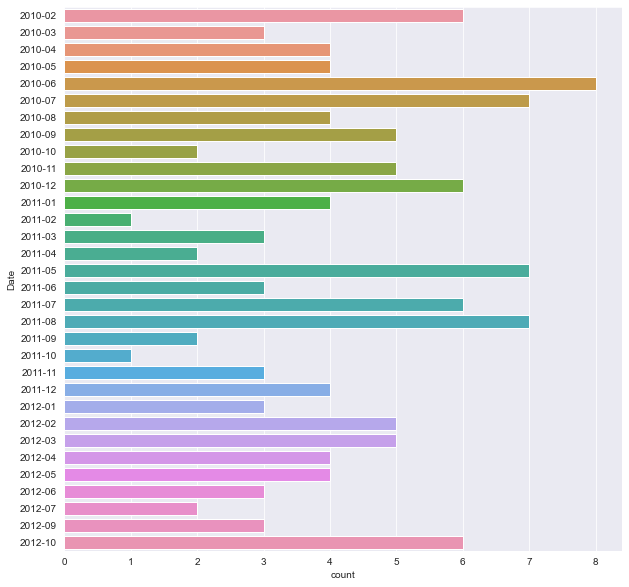

In [8]:
plt.figure(figsize=(10, 10))
sns.countplot(y=data['Date'].dt.to_period('M').sort_values())

Let's get into more details. We will create new columns :

In [9]:
data['year'] = data['Date'].dt.year.astype('Int64')
data['month'] = data['Date'].dt.month.astype('Int64')
data['day'] = data['Date'].dt.day.astype('Int64')
data['dayofyear'] = data['Date'].dt.dayofyear.astype('Int64')
data['week'] = data['Date'].dt.week.astype('Int64')
data['dayofweek'] = data['Date'].dt.dayofweek.astype('Int64')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,dayofyear,week,dayofweek
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011,2,18,49,7,4
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,84,12,4
2,17.0,2012-07-27,NaN,0.0,NaN,NaN,130.719581,5.936,2012,7,27,209,30,4
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,148,21,4


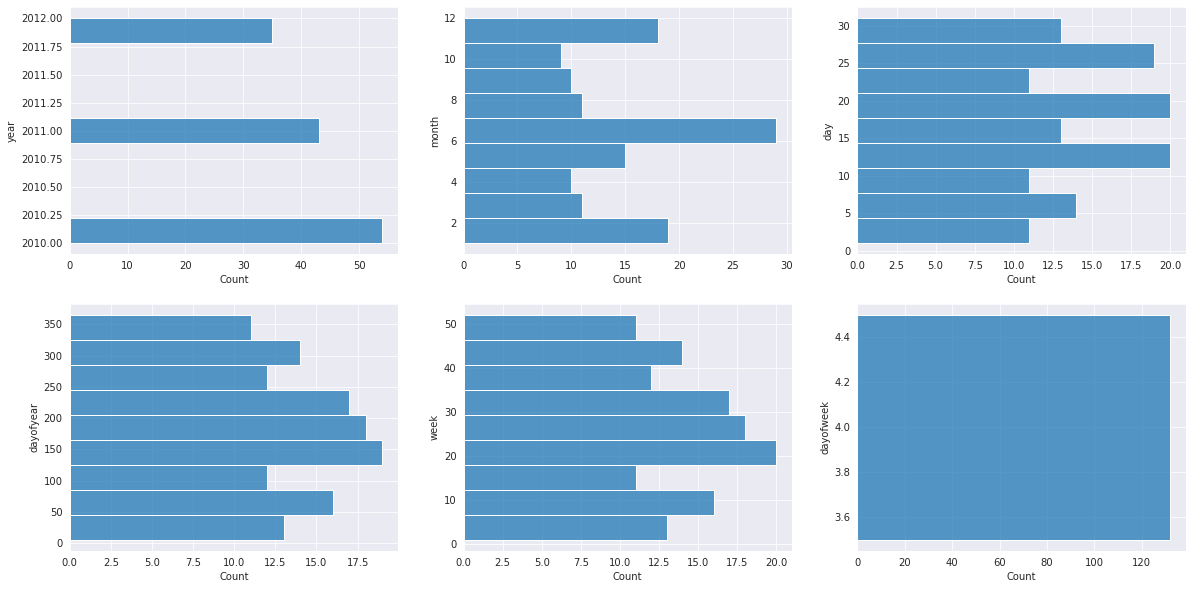

In [62]:
n_rows=2
n_cols=3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 10))
for i, column in enumerate(data.iloc[:,-6:]):
    g = sns.histplot(y=data[column].sort_values(), ax=axes[i // n_cols, i % n_cols], stat='count')

#### Holiday Flag

As expected, most the records have the Holiday Falg set to 0. We can therefore impute the missing value with **0**.

In [50]:
print(f'There are {data["Holiday_Flag"].isnull().sum()} rows with a missing holiday flag')

There are 12 rows with a missing holiday flag


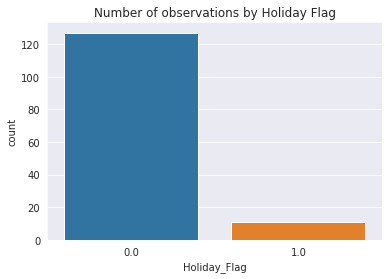

In [69]:
sns.countplot(x=data['Holiday_Flag']).set(title='Number of observations by Holiday Flag');

### Quantitative variables
#### Temperatures

In [52]:
print(f'The min temperature {data["Temperature"].min()} and the max is {data["Temperature"].max()}')
print(f'There are {data["Temperature"].isnull().sum()} rows with a missing temparature')

The min temperature 18.79 and the max is 91.65
There are 18 rows with a missing temparature


In [92]:
data['Temperature'].describe()

count    132.000000
mean      61.398106
std       18.378901
min       18.790000
25%       45.587500
50%       62.985000
75%       76.345000
max       91.650000
Name: Temperature, dtype: float64

Looking at the boxplot, there does to not seem to have any outliers for these features. We will still calculate if the data falls within  $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$

<AxesSubplot:xlabel='Temperature'>

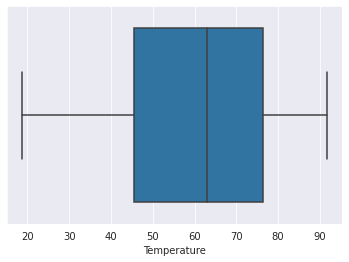

In [89]:
sns.boxplot(x=data['Temperature'])

In [12]:
# Function that we will reuse for the other features
import numpy as np
def is_outlier(value, data):
    mean = np.mean(data)
    std = np.std(data)
    if (mean - 3*std) <= value <= (mean + 3*std):
        return False
    else:
        return True
    

In [102]:
data['temperature_outlier'] = data['Temperature'].apply(lambda x : is_outlier(x, data['Temperature']) if not np.isnan(x) else x )

We can confirm there no outliers to drop for the Temperature feature.

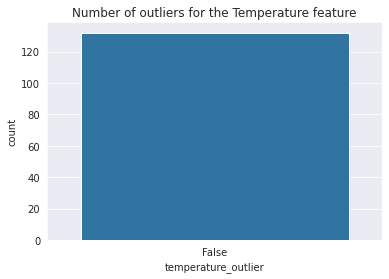

In [105]:
sns.countplot(x=data['temperature_outlier']).set(title='Number of outliers for the Temperature feature');

As expected there is a high corroletation between the month of the year of the temperature.

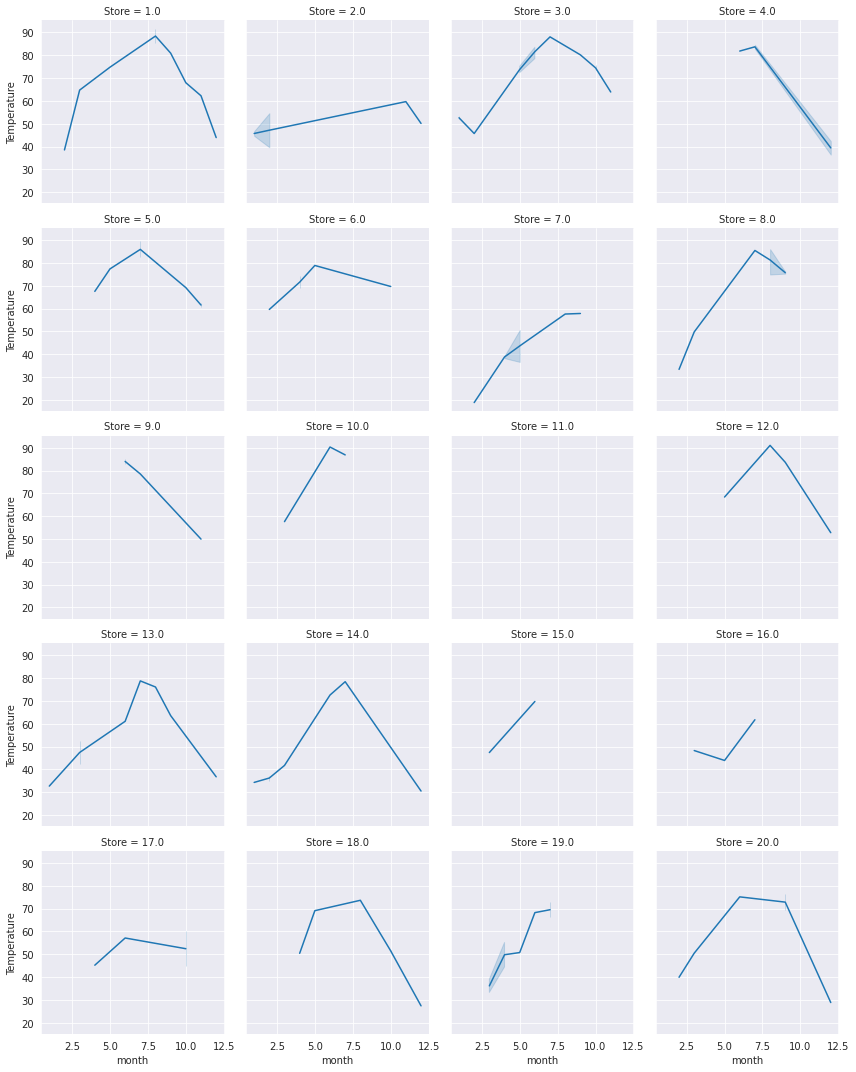

In [58]:
g = sns.FacetGrid(data, col='Store', col_wrap=4)
g.map(sns.lineplot, 'month', 'Temperature')

Text(0.5, 1.0, 'Temperature by month')

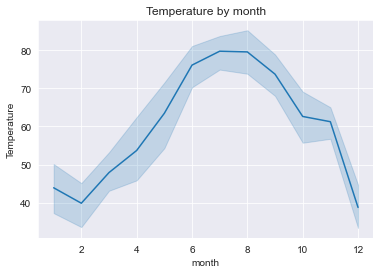

In [53]:
sns.lineplot(data=data, x='month', y='Temperature').set_title('Temperature by month')

#### Fuel Price

In [115]:
data['Fuel_Price'].describe()

count    136.000000
mean       3.320853
std        0.478149
min        2.514000
25%        2.852250
50%        3.451000
75%        3.706250
max        4.193000
Name: Fuel_Price, dtype: float64

In [114]:
print(f'There are {data["Fuel_Price"].isnull().sum()} rows with a missing Fuel Price')

There are 14 rows with a missing Fuel Price


There are no outliers for this feature

In [13]:
data['fuel_price_outlier'] = data['Fuel_Price'].apply(lambda x : is_outlier(x, data['Fuel_Price']) if not np.isnan(x) else x )

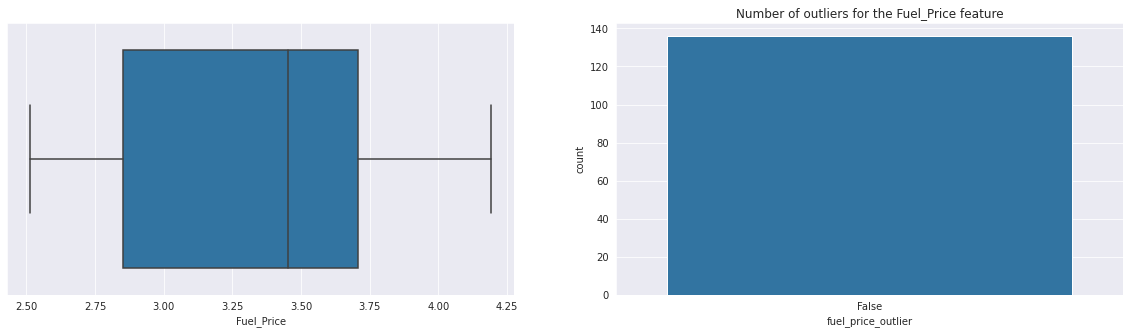

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x=data['Fuel_Price'], ax=axes[0])
sns.countplot(x=data['fuel_price_outlier'], ax=axes[1]).set(title='Number of outliers for the Fuel_Price feature');

The fuel price does not seem to be different for different stores. However we can clearly see an upward trend.

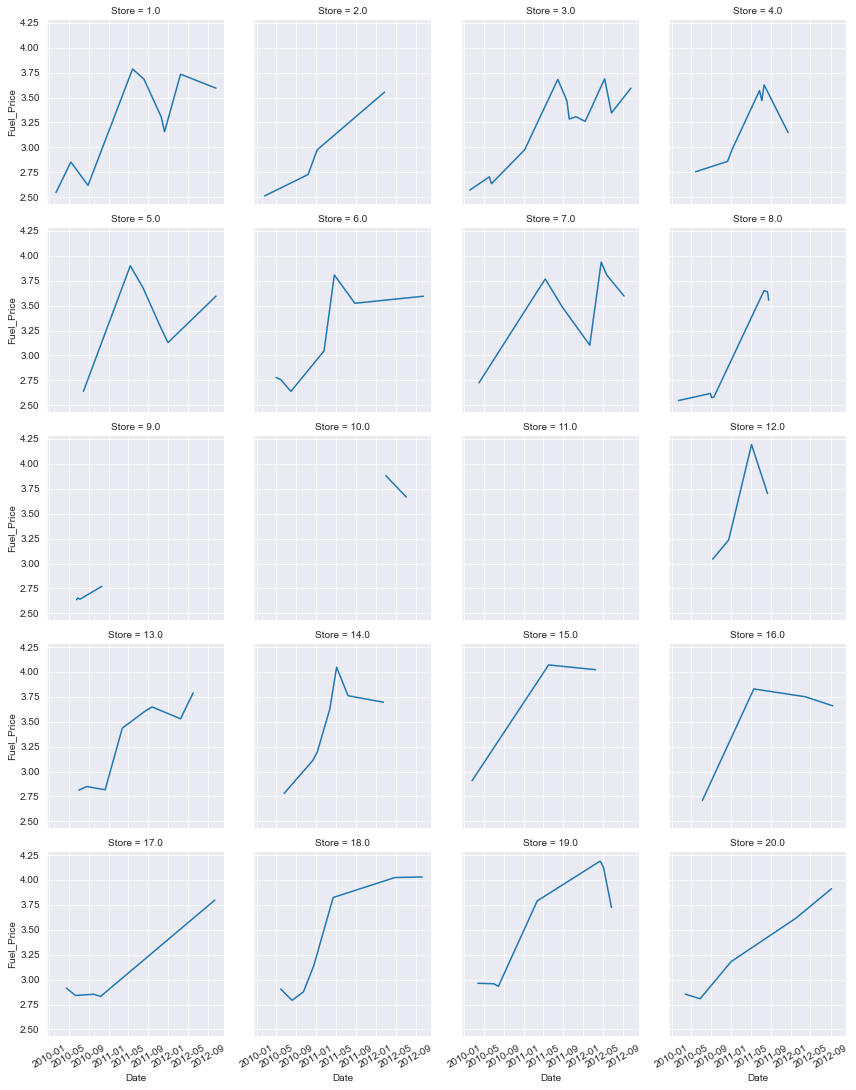

In [10]:
g = sns.FacetGrid(data, col='Store', col_wrap=4)
g.map(sns.lineplot, 'Date', 'Fuel_Price')
g.set_xticklabels(rotation=30)

The following graph highlights the fuel price fluctuation and the fact the price is cleary incresing overtime.

Text(0.5, 1.0, 'Fuel price over time')

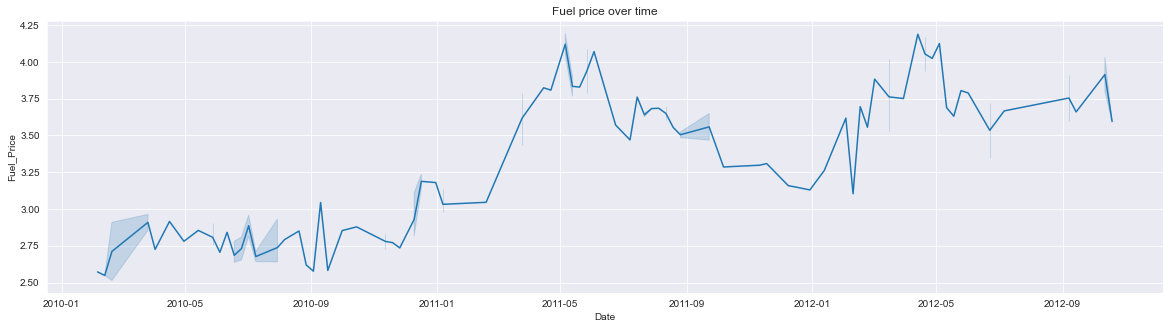

In [54]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=data, x='Date', y='Fuel_Price').set_title('Fuel price over time')

#### CPI

In [18]:
data['CPI'].describe()

count    138.000000
mean     179.898509
std       40.274956
min      126.111903
25%      131.970831
50%      197.908893
75%      214.934616
max      226.968844
Name: CPI, dtype: float64

In [20]:
print(f'There are {data["CPI"].isnull().sum()} rows with a missing CPI')

There are 12 rows with a missing CPI


There are not outliers for this feature

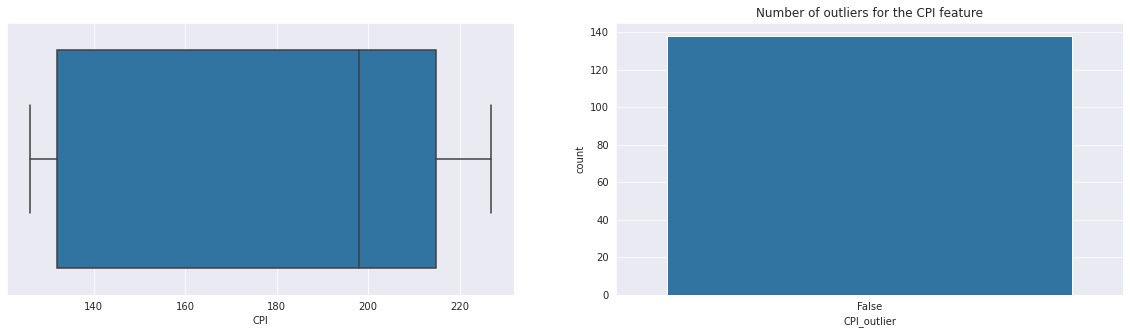

In [22]:
data['CPI_outlier'] = data['CPI'].apply(lambda x : is_outlier(x, data['CPI']) if not np.isnan(x) else x )
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x=data['CPI'], ax=axes[0])
sns.countplot(x=data['CPI_outlier'], ax=axes[1]).set(title='Number of outliers for the CPI feature');

The plots below show that CPI is different for each Store. Overtime it is also slightly increasing. 

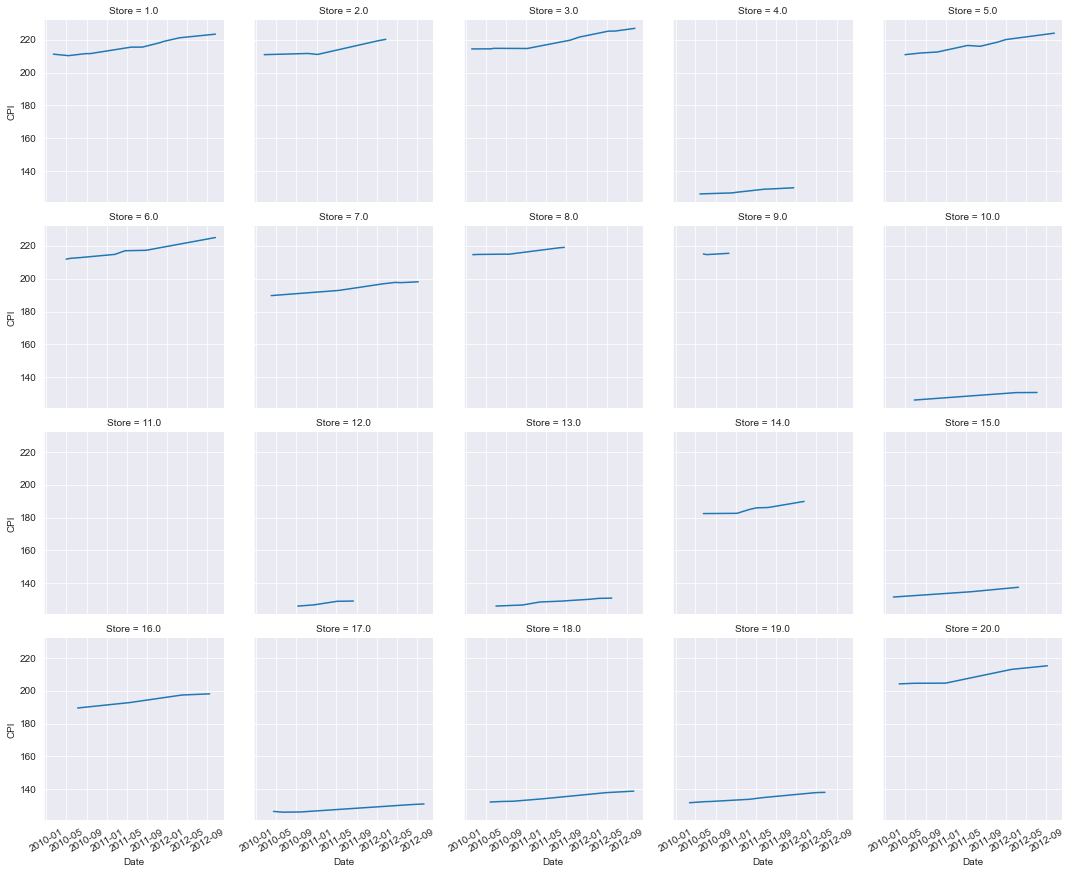

In [12]:
g = sns.FacetGrid(data, col='Store', col_wrap=5)
g.map(sns.lineplot, 'Date', 'CPI')
g.set_xticklabels(rotation=30)

#### Unemployment

In [56]:
data['Unemployment'].describe()

count    135.000000
mean       7.598430
std        1.577173
min        5.143000
25%        6.597500
50%        7.470000
75%        8.150000
max       14.313000
Name: Unemployment, dtype: float64

In [58]:
print(f'There are {data["Unemployment"].isnull().sum()} rows with a missing Unemployment')

There are 15 rows with a missing Unemployment


We found 5 outliers but when we look at it more closely, we realise that the 5 outliers are all the records for the Store 12. It might suggest that this specific store is located in a poorer area than the others. The CPI for this store is also low. 
I suggest not deleting this outliers and see how the model perform.

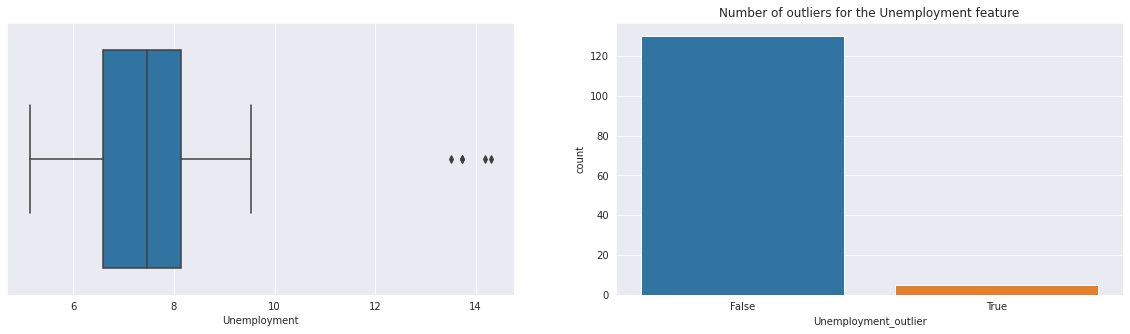

In [60]:
data['Unemployment_outlier'] = data['Unemployment'].apply(lambda x : is_outlier(x, data['Unemployment']) if not np.isnan(x) else x )
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x=data['Unemployment'], ax=axes[0])
sns.countplot(x=data['Unemployment_outlier'], ax=axes[1]).set(title='Number of outliers for the Unemployment feature');

In [62]:
data[data['Unemployment_outlier'] == True]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,dayofyear,week,dayofweek,fuel_price_outlier,CPI_outlier,Unemployment_outlier
30,12.0,2011-05-06,1021154.48,0.0,68.40,4.193,129.044433,13.736,2011,5,6,126,18,4,False,False,True
62,12.0,2010-12-17,1295605.35,0.0,52.77,3.236,126.879484,14.313,2010,12,17,351,50,4,False,False,True
68,12.0,2011-08-12,955913.68,0.0,91.04,3.701,129.201581,13.503,2011,8,12,224,32,4,False,False,True
93,12.0,2011-05-27,964332.51,0.0,NaN,4.087,129.062355,13.736,2011,5,27,147,21,4,False,False,True
135,12.0,2010-09-10,903119.03,1.0,83.63,3.044,126.114581,14.180,2010,9,10,253,36,4,False,False,True


In [63]:
data[data['Store'] == 12.0]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,dayofyear,week,dayofweek,fuel_price_outlier,CPI_outlier,Unemployment_outlier
30,12.0,2011-05-06,1021154.48,0.0,68.40,4.193,129.044433,13.736,2011,5,6,126,18,4,False,False,True
62,12.0,2010-12-17,1295605.35,0.0,52.77,3.236,126.879484,14.313,2010,12,17,351,50,4,False,False,True
68,12.0,2011-08-12,955913.68,0.0,91.04,3.701,129.201581,13.503,2011,8,12,224,32,4,False,False,True
93,12.0,2011-05-27,964332.51,0.0,NaN,4.087,129.062355,13.736,2011,5,27,147,21,4,False,False,True
135,12.0,2010-09-10,903119.03,1.0,83.63,3.044,126.114581,14.180,2010,9,10,253,36,4,False,False,True


There dies n

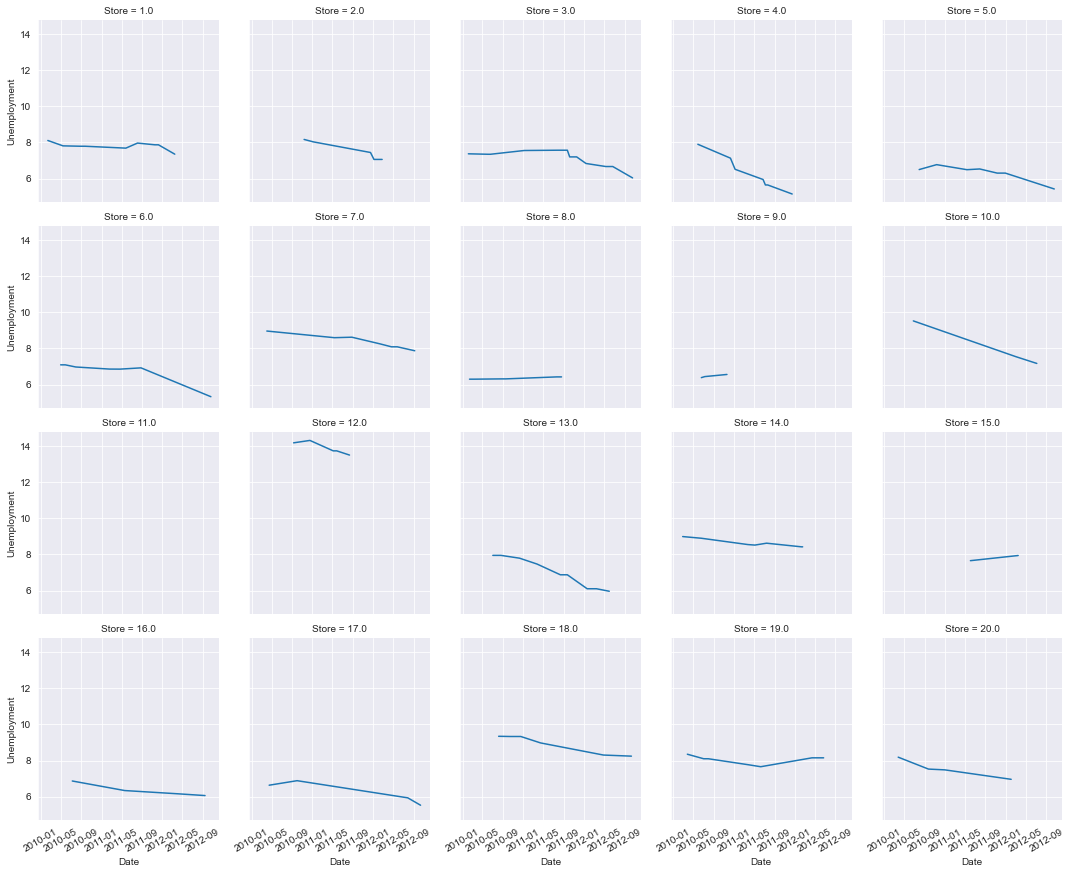

In [14]:
g = sns.FacetGrid(data, col='Store', col_wrap=5)
g.map(sns.lineplot, 'Date', 'Unemployment')
g.set_xticklabels(rotation=30)

## 2. Correlation

In [15]:
data_cat = data[['Date', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month', 'day',
       'dayofyear', 'week', 'dayofweek']]
corr = data_cat.corr()

<AxesSubplot:>

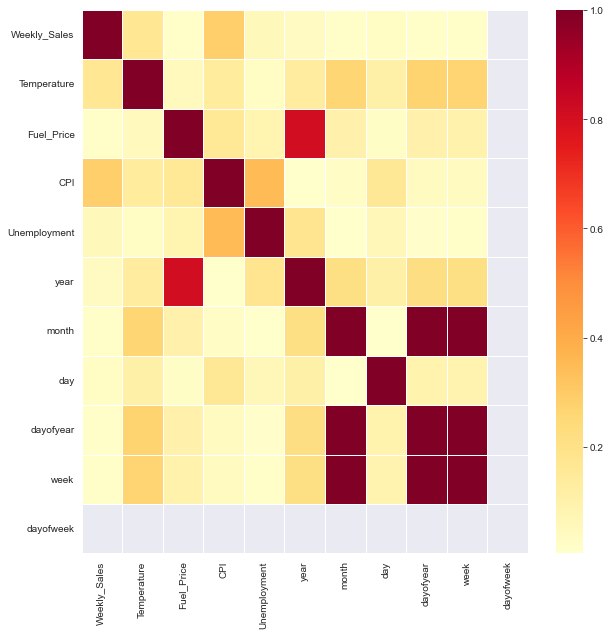

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr.abs(), linewidths=.5, cmap='YlOrRd')

# Conclusion and takeaways for data cleaning

- [ ] **Date**: Create *Year* and *Month* columns from *Date*. Drop the *Date* column.
- [ ] **Year**: Compute mean of *Fuel_Price* by year and impute with the year the *Fuel_price* is the closest to the mean
- [ ] **Month**: Compute mean of *Tempurature* by month and impute with the month the *Tempurature* is the closest to the mean
- [ ] **Store**: Nothing.
- [ ] **Temperature**: Impute missing values with the mean of the temprature of the observation month
- [ ] **Fuel_Price**: Impute missing values with the average fuel price of the year
- [ ] **CPI**: Impute missing values with the mean CPI of the store
- [ ] **Unemployment**: Impute with the median
- [ ] **Weekly_Sales**: Drop missing values